# Zadania z zajęć z warsztatów badawczych


## Zadanie 1: Generowanie Struktur 3D
Należy stworzyć zestaw początkowych struktur 3D, takich jak:
- Losowy spacer (random walk)
- Samo-unikający się losowy spacer (self-avoiding random walk)
- Koło
- Linia
- Linia z szumem
- Krzywa Hilberta

Struktury te należy zapisać w formacie `.cif`.

---

## Zadanie 2: Implementacja Metody Gradientu Prostego
Obliczamy minima dla dwóch funkcji:
1. \( V(x, y) = (x - 1)^2 + (y - 1)^2 \)
2. \( V(x, y) = x^2 + y^2 + 10 (cos(2\pi x) + sin(2\pi y)) \)

Należy:
- Zaimplementować metodę gradientu prostego od podstaw.
- Wykonać obliczenia dla różnych warunków początkowych.
- Zwizualizować trajektorie na konturowych wykresach.

---

## Zadanie 3: Metoda Metropolisa
Minimalizujemy funkcje z Zadania 7 przy użyciu algorytmu Metropolisa:
- Układ podlega rozkładowi Boltzmanna.
- Proponujemy ruchy losowe i akceptujemy je zgodnie z kryterium Metropolisa.
- Eksperymentujemy z różnymi temperaturami oraz symulowanym wyżarzaniem.
- Porównujemy wyniki z metodą gradientu prostego.

---

## Zadanie 4: Implementacja metody Eulera
Za pomocą metody Eulera rozwiązujemy:
1. Równanie rozpadu wykładniczego: \( dx/dt = -lambda*x \)


2. Wizualizujemy wyniki i porównujemy z rozwiązaniem analitycznym
---



In [5]:
!pip install ase

In [6]:
# zad 1

In [7]:
import numpy as np
import random
from ase import Atoms
from ase.io import write



In [8]:
def random_walk_3d(steps=100):
    positions = [(0, 0, 0)]
    for _ in range(steps):
        step = np.random.choice([-1, 1], size=3)  # Losowy ruch w 3D
        new_pos = tuple(np.array(positions[-1]) + step)
        positions.append(new_pos)
    return positions



In [9]:
def self_avoiding_random_walk_3d(steps=100):
    positions = [(0, 0, 0)]
    visited = set(positions)
    for _ in range(steps):
        possible_moves = [tuple(np.array(positions[-1]) + step) for step in
                          [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0), (0, 0, 1), (0, 0, -1)]]
        random.shuffle(possible_moves)
        for move in possible_moves:
            if move not in visited:
                positions.append(move)
                visited.add(move)
                break
    return positions



In [10]:
def circle_3d(radius=10, points=100):
    return [(radius * np.cos(2 * np.pi * i / points), radius * np.sin(2 * np.pi * i / points), 0) for i in range(points)]

def line_3d(length=100):
    return [(i, 0, 0) for i in range(length)]

def line_with_noise_3d(length=100, noise=0.5):
    return [(i, random.uniform(-noise, noise), random.uniform(-noise, noise)) for i in range(length)]



In [11]:
def save_to_cif(structure, filename):
    atoms = Atoms('C' * len(structure), positions=structure)
    write(filename, atoms)



In [12]:
# Generowanie struktur
structures = {
    "random_walk.cif": random_walk_3d(100),
    "self_avoiding_random_walk.cif": self_avoiding_random_walk_3d(100),
    "circle.cif": circle_3d(10, 100),
    "line.cif": line_3d(100),
    "line_with_noise.cif": line_with_noise_3d(100, 0.5)
}

# Zapisywanie do plików CIF
for filename, structure in structures.items():
    save_to_cif(structure, filename)
    print(f"Saved {filename}")

Saved random_walk.cif
Saved self_avoiding_random_walk.cif
Saved circle.cif
Saved line.cif
Saved line_with_noise.cif


In [ ]:
#2

In [13]:

import matplotlib.pyplot as plt

def V1(x, y):
    return (x - 1) ** 2 + (y - 1) ** 2

def V2(x, y):
    return x**2 + y**2 + 10 * (np.cos(2 * np.pi * x) + np.sin(2 * np.pi * y))



In [16]:
def gradient_V1(x, y):
    return np.array([2 * (x - 1), 2 * (y - 1)])

def gradient_V2(x, y):
    return np.array([
        2 * x - 20 * np.pi * np.sin(2 * np.pi * x),
        2 * y + 20 * np.pi * np.cos(2 * np.pi * y)
    ])


In [17]:

def gradient_descent(grad_func, x0, y0, lr=0.1, tol=1e-6, max_iters=1000):
    x, y = x0, y0
    trajectory = [(x, y)]
    for _ in range(max_iters):
        grad = grad_func(x, y)
        x -= lr * grad[0]
        y -= lr * grad[1]
        trajectory.append((x, y))
        if np.linalg.norm(grad) < tol:
            break
    return np.array(trajectory)



In [18]:
# Testowanie gradient descent dla różnych warunków początkowych
initial_conditions = [(-2, -2), (0, 0), (2, 2), (-1, 1)]
trajectories_V1 = [gradient_descent(gradient_V1, x0, y0) for x0, y0 in initial_conditions]
trajectories_V2 = [gradient_descent(gradient_V2, x0, y0) for x0, y0 in initial_conditions]



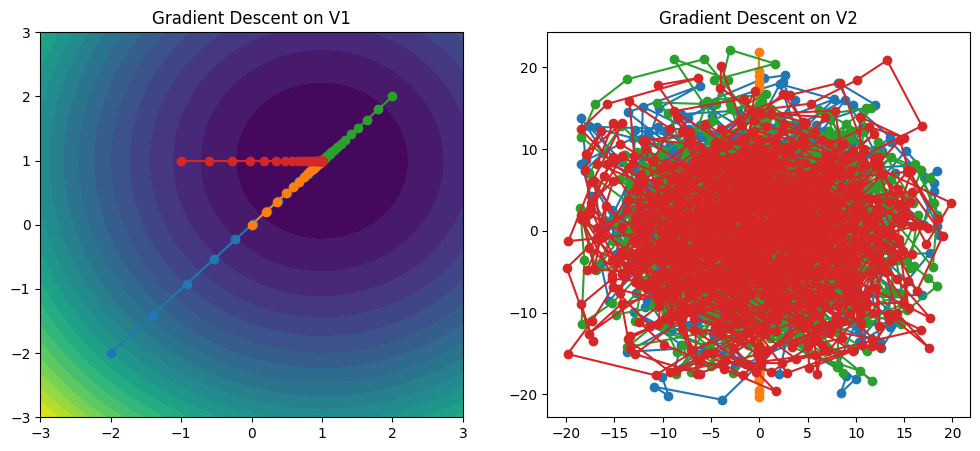

In [24]:
# Wykresy
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z1 = V1(X, Y)
Z2 = V2(X, Y)

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
# Pierwsza funkcja
axes[0].contourf(X, Y, Z1, levels=30, cmap='viridis')
for traj in trajectories_V1:
    axes[0].plot(traj[:, 0], traj[:, 1], marker='o')
axes[0].set_title("Gradient Descent on V1")
# Druga funkcja
axes[1].contourf(X, Y, Z2, levels=30, cmap='viridis')
for traj in trajectories_V2:
    axes[1].plot(traj[:, 0], traj[:, 1], marker='o')
axes[1].set_title("Gradient Descent on V2")
plt.show()

In [ ]:
#3

In [25]:
def metropolis_algorithm(V, x0, y0, T, steps=10000):
    x, y = x0, y0
    trajectory = [(x, y)]
    for _ in range(steps):
        x_new = x + np.random.normal(0, 0.1)
        y_new = y + np.random.normal(0, 0.1)

        dV = V(x_new, y_new) - V(x, y)

        if dV < 0 or np.random.rand() < np.exp(-dV / T):
            x, y = x_new, y_new
            trajectory.append((x, y))

    return np.array(trajectory)



In [26]:
# Testowanie Metropolisa dla różnych temperatur
temperatures = [2, 1, 0.5, 0.1]
initial_conditions = [(-2, -2), (0, 0), (2, 2), (-1, 1)]
trajectories_V1 = {T: [metropolis_algorithm(V1, x0, y0, T) for x0, y0 in initial_conditions] for T in temperatures}
trajectories_V2 = {T: [metropolis_algorithm(V2, x0, y0, T) for x0, y0 in initial_conditions] for T in temperatures}



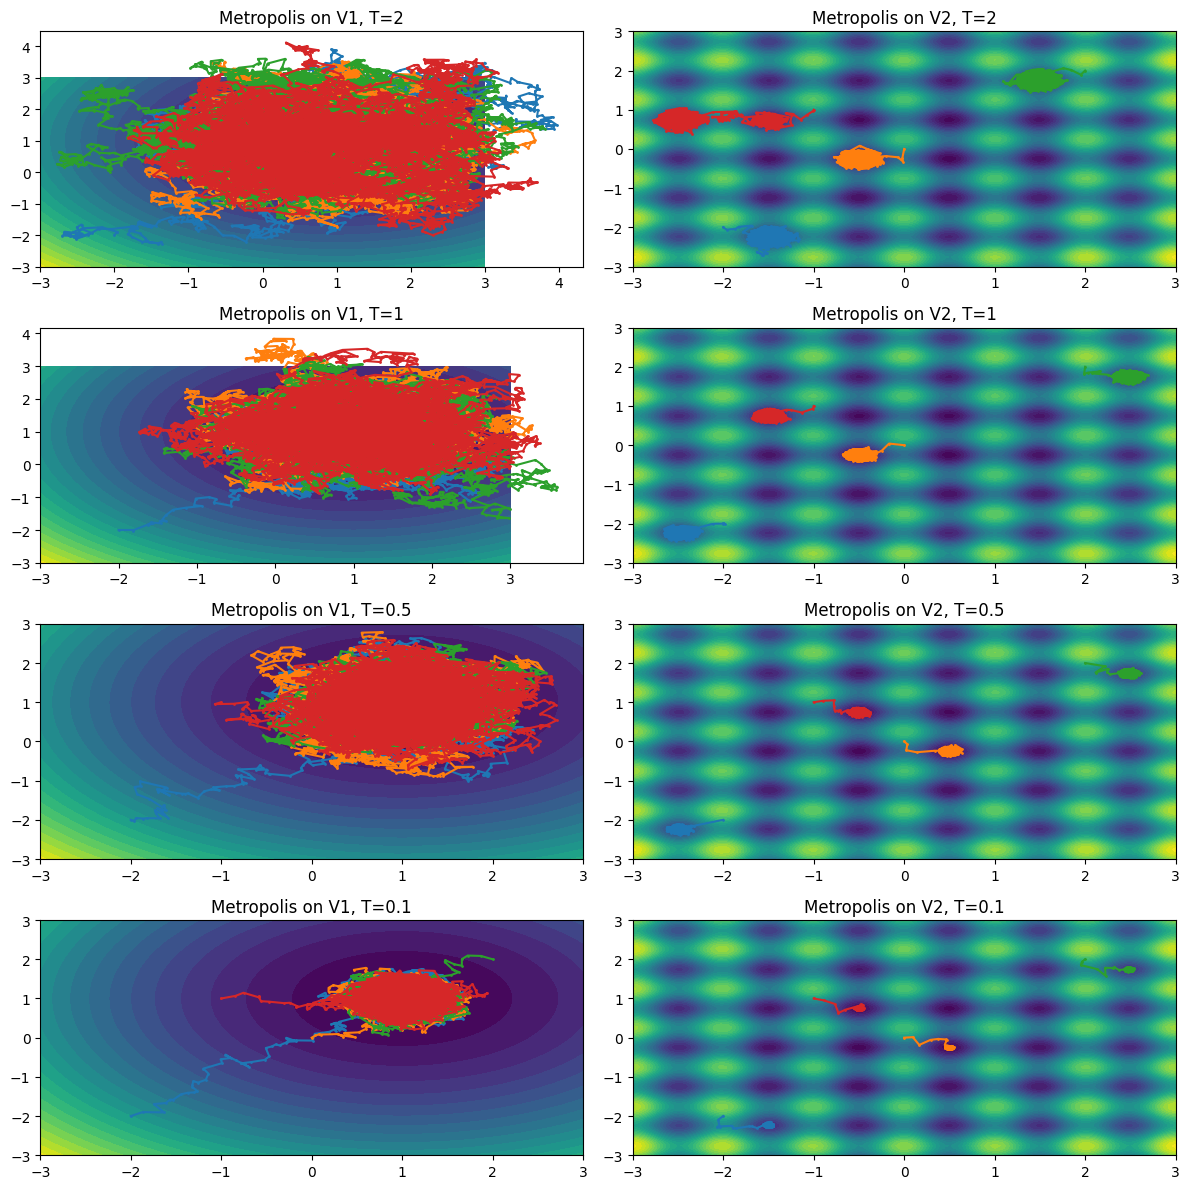

In [28]:
# Wykresy
fig, axes = plt.subplots(len(temperatures), 2, figsize=(12, 3 * len(temperatures)))
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z1 = V1(X, Y)
Z2 = V2(X, Y)

for i, T in enumerate(temperatures):
    axes[i, 0].contourf(X, Y, Z1, levels=30, cmap='viridis')
    for traj in trajectories_V1[T]:
        axes[i, 0].plot(traj[:, 0], traj[:, 1], marker='o', markersize=1)
    axes[i, 0].set_title(f"Metropolis on V1, T={T}")

    axes[i, 1].contourf(X, Y, Z2, levels=30, cmap='viridis')
    for traj in trajectories_V2[T]:
        axes[i, 1].plot(traj[:, 0], traj[:, 1], marker='o', markersize=1)
    axes[i, 1].set_title(f"Metropolis on V2, T={T}")

plt.tight_layout()
plt.show()

In [ ]:
#4

In [29]:
def euler_method(f, x0, t0, t_end, dt):
    t_values = np.arange(t0, t_end, dt)
    x_values = np.zeros_like(t_values)
    x_values[0] = x0

    for i in range(1, len(t_values)):
        x_values[i] = x_values[i - 1] + dt * f(x_values[i - 1])

    return t_values, x_values



In [30]:
def exponential_decay(x):
    return -lambda_ * x



In [31]:
# Parametry
lambda_ = 1.0
x0 = 2.0
t0, t_end, dt = 0, 5, 0.1


t_values, x_values = euler_method(exponential_decay, x0, t0, t_end, dt)
t_exact = np.linspace(t0, t_end, 100)
x_exact = x0 * np.exp(-lambda_ * t_exact)



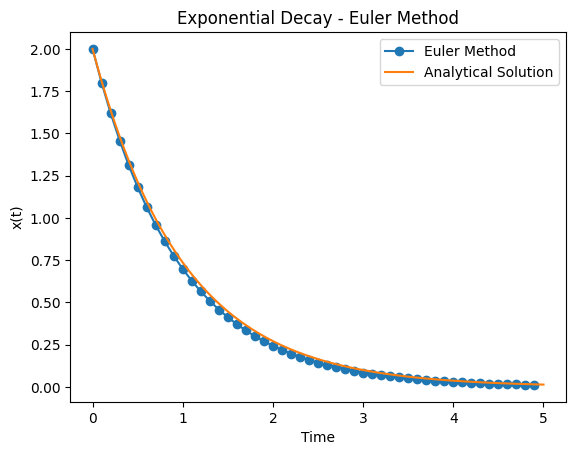

In [32]:
# Wykres
plt.plot(t_values, x_values, 'o-', label='Euler Method')
plt.plot(t_exact, x_exact, '-', label='Analytical Solution')
plt.xlabel('Time')
plt.ylabel('x(t)')
plt.legend()
plt.title('Exponential Decay - Euler Method')
plt.show()

